# Разработка A/B-тестирования и анализ результатов

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
sessions_history = pd.read_csv('/datasets/sessions_project_history.csv')
display(sessions_history.head(5))

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными

In [3]:
session_counts = sessions_history.groupby('user_id')['session_id'].nunique()
max_sessions = session_counts.max()
top_users = session_counts[session_counts == max_sessions].index
top_user_id = top_users[0]
top_user_sessions = sessions_history[sessions_history['user_id'] == top_user_id]
display(top_user_sessions)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


#### 1.3. Анализ числа регистраций

In [4]:
daily_stats = sessions_history.groupby('session_date').agg(
    total_users=('user_id', 'nunique'),
    registered_users=('registration_flag', 'sum')
).reset_index()
daily_stats['registration_rate'] = daily_stats['registered_users'] / daily_stats['total_users']#Доля зарегистрированных

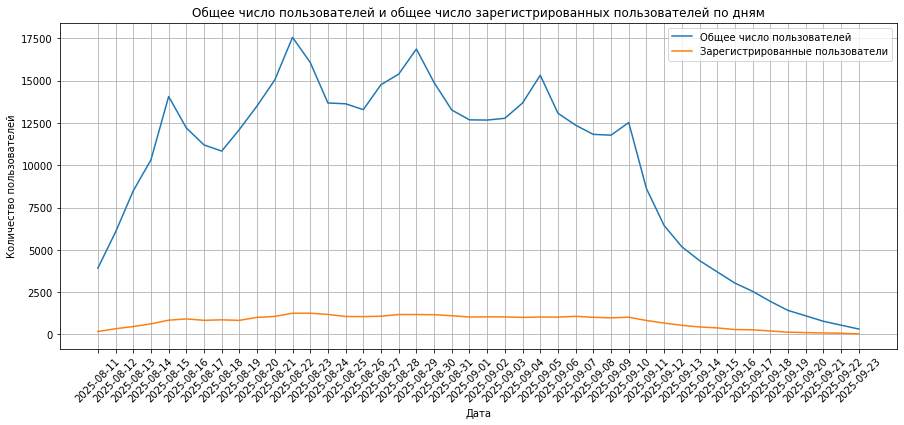

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(daily_stats['session_date'], daily_stats['total_users'], label='Общее число пользователей')
plt.plot(daily_stats['session_date'], daily_stats['registered_users'], label='Зарегистрированные пользователи')

plt.title('Общее число пользователей и общее число зарегистрированных пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

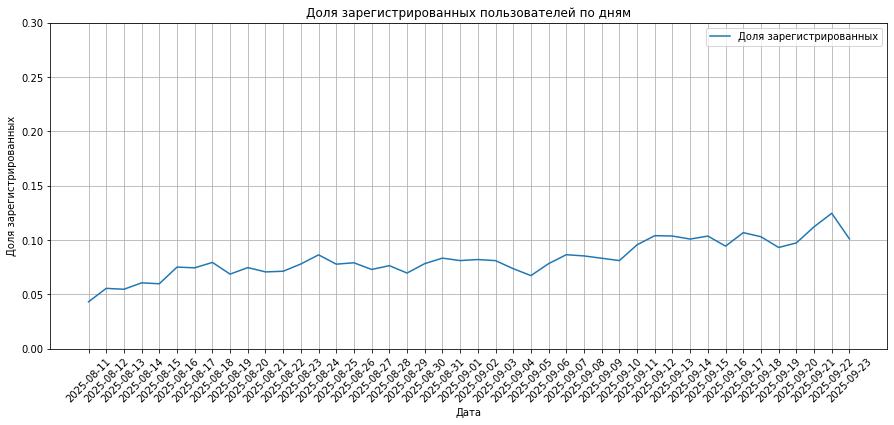

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(daily_stats['session_date'], daily_stats['registration_rate'], label='Доля зарегистрированных')

plt.title('Доля зарегистрированных пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Доля зарегистрированных')
plt.ylim(0, 0.3)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

#### 1.4. Анализ числа просмотренных страниц

In [7]:
sessions_by_page_count = sessions_history.groupby('page_counter').size().reset_index(name='session_count')
sessions_by_page_count = sessions_by_page_count.sort_values(by='page_counter')
print(sessions_by_page_count)

   page_counter  session_count
0             1          29160
1             2         105536
2             3         166690
3             4         105569
4             5          26288
5             6           2589
6             7             92


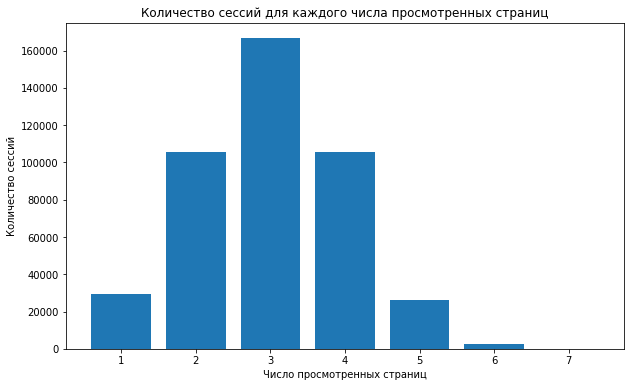

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(sessions_by_page_count['page_counter'], sessions_by_page_count['session_count'])
plt.title('Количество сессий для каждого числа просмотренных страниц')
plt.xlabel('Число просмотренных страниц')
plt.ylabel('Количество сессий')
plt.show()

#### 1.5. Доля пользователей, просмотревших более четырёх страниц

In [9]:
sessions_history['good_session'] = (sessions_history['page_counter'] >= 4).astype(int)
daily_success_rate = sessions_history.groupby('session_date').agg(
    total_sessions=('session_id', 'count'),
    successful_sessions=('good_session', 'sum')
).reset_index()
daily_success_rate['success_rate'] = daily_success_rate['successful_sessions'] / daily_success_rate['total_sessions']
#Доля успешных

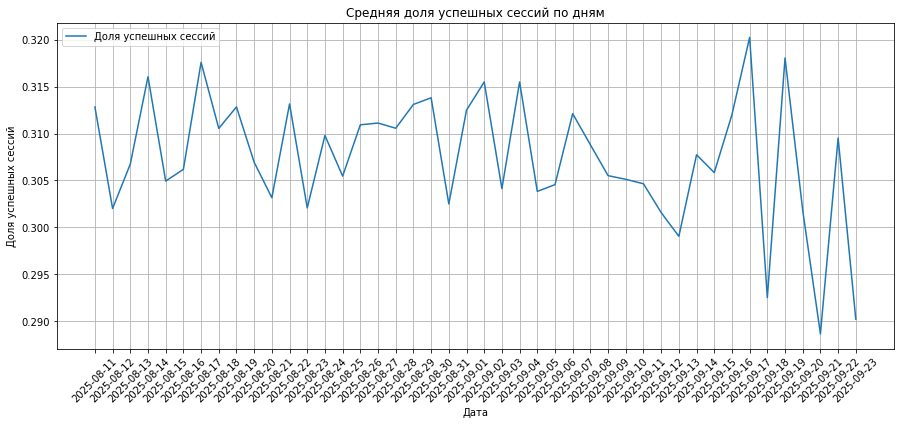

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(daily_success_rate['session_date'], daily_success_rate['success_rate'], label='Доля успешных сессий')
plt.title('Средняя доля успешных сессий по дням')
plt.xlabel('Дата')
plt.ylabel('Доля успешных сессий')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 2. Подготовка к тесту

#### 2.1 Формулировка нулевой и альтернативной гипотез

- Нулевая гипотеза (Н0): Доля успешных сессий при внедрении нового алгоритма не изменится.

- Альтернативная гипотеза (Н1): Доля успешных сессий при внедрении нового алгоритма вырастет.

#### 2.2. Расчёт размера выборки

In [11]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
p1 = 0.3 # Базовый уровень доли
mde = 0.03 * p1  # Минимальный детектируемый эффект
effect_size = proportion_effectsize(p1, p1 + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 41040


#### 2.3. Расчёт длительности A/B-теста

In [12]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
unique_users_per_day = sessions_history.groupby('session_date')['user_id'].nunique()
avg_daily_users = unique_users_per_day.mean()

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(sample_size*2/avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровне трафика в {round(avg_daily_users,2)} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровне трафика в 9907.36 пользователей в день составит 9 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

In [13]:
sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv')
user_counts = sessions_test_part.groupby('test_group')['user_id'].nunique()
users_A = user_counts.get('A', 0)
users_B = user_counts.get('B', 0)
P = 100 * abs(users_A - users_B) / users_A
print(f"Уникальные пользователи в группе A: {users_A}")
print(f"Уникальные пользователи в группе B: {users_B}")
print(f"Процентная разница: {P:.2f}%")

Уникальные пользователи в группе A: 1477
Уникальные пользователи в группе B: 1466
Процентная разница: 0.74%


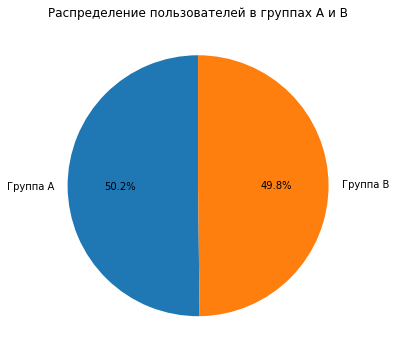

In [14]:
labels = ['Группа A', 'Группа B']
sizes = [users_A, users_B]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Распределение пользователей в группах A и B')
plt.show()

#### 3.2. Проверка пересечений пользователей

In [15]:
group_A = set(sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'].unique())
group_B = set(sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'].unique())
both_users = group_A & group_B
print(len(both_users))

0


#### 3.3. Равномерность разделения пользователей по устройствам

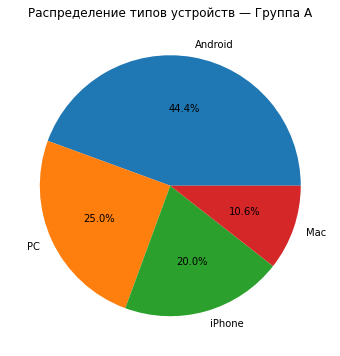

In [16]:
unique_users = sessions_test_part[['user_id', 'device', 'test_group']].drop_duplicates('user_id')
group_A_users = unique_users[unique_users['test_group'] == 'A']
group_B_users = unique_users[unique_users['test_group'] == 'B']
group_A_users['device'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', figsize=(6, 6), 
    title='Распределение типов устройств — Группа A',
    normalize=True
)
plt.ylabel('')
plt.show()

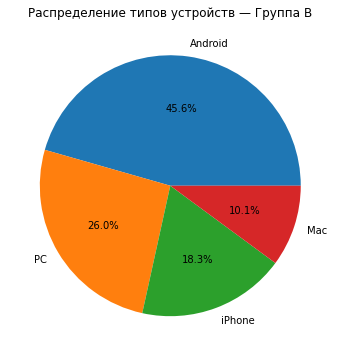

In [17]:
group_B_users['device'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', figsize=(6, 6), 
    title='Распределение типов устройств — Группа B',
    normalize=True
)
plt.ylabel('')
plt.show()

#### 3.4. Равномерность распределения пользователей по регионам

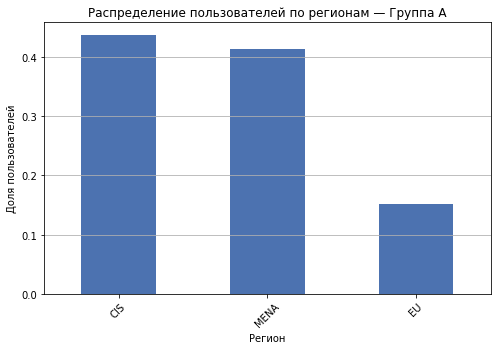

In [18]:
unique_region = sessions_test_part[['user_id', 'region', 'test_group']].drop_duplicates('user_id')
group_A_region = unique_region[unique_region['test_group'] == 'A']
group_B_region = unique_region[unique_region['test_group'] == 'B']
region_A = group_A_region['region'].value_counts(normalize=True)
plt.figure(figsize=(8, 5))
region_A.plot(kind='bar', color='#4c72b0')
plt.title('Распределение пользователей по регионам — Группа A')
plt.xlabel('Регион')
plt.ylabel('Доля пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

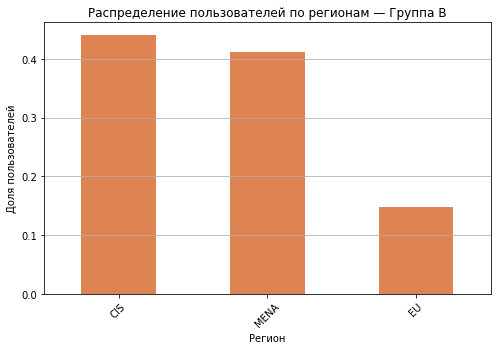

In [19]:
region_B = group_B_region['region'].value_counts(normalize=True)
plt.figure(figsize=(8, 5))
region_B.plot(kind='bar', color='#dd8452')
plt.title('Распределение пользователей по регионам — Группа B')
plt.xlabel('Регион')
plt.ylabel('Доля пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### 3.5. Вывод после проверки A/B-теста

Уникальные пользователи в группе A: 1477. Уникальные пользователи в группе B: 1466. Процентная разница: 0.74%. Анализ показал, что количество уникальных пользователей в группах A и B отличается, однако уровень расхождения незначительный. 

Пересечений пользователей в двух группах не найдено. Распределение пользователей по типам устройств схожее, значительных перекосов между группами нет. Распределение по регионам между группами также равномерное.

Нарушений в проведении A/B-теста не выявлено, тест можно считать корректным.

### 4. Проверка результатов A/B-теста

#### 4.1. Получение результатов теста и подсчёт основной метрики

In [20]:
sessions_test = pd.read_csv('/datasets/sessions_project_test.csv')
sessions_test['good_session'] = (sessions_test['page_counter'] >= 4).astype(int)

#### 4.2. Проверка корректности результатов теста

In [21]:
from scipy.stats import ttest_ind
daily_sessions = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().reset_index()
daily_sessions = daily_sessions.pivot(index='session_date', columns='test_group', values='session_id')
stat, p_value = ttest_ind(daily_sessions['A'], daily_sessions['B'], equal_var=False)
alpha = 0.05
if p_value < alpha:
    print(f"p-value: {p_value:.4f}")
    print("Различие в средних количествах дневных сессий статистически значимо. Возможен дисбаланс.")
else:
    print(f"p-value: {p_value:.4f}")
    print("Различие в средних количествах дневных сессий незначимо. Распределение корректно.")

p-value: 0.9382
Различие в средних количествах дневных сессий незначимо. Распределение корректно.


#### 4.3. Сравнение доли успешных сессий

In [22]:
good = sessions_test.groupby('test_group')['good_session'].agg(['mean', 'count'])
good_A = good.loc['A', 'mean']
good_B = good.loc['B', 'mean']
diff = good_B - good_A
print(f"Доля успешных сессий в группе A: {good_A:.4f}")
print(f"Доля успешных сессий в группе B: {good_B:.4f}")
print(f"Разница между группами: {diff:.4f}")

Доля успешных сессий в группе A: 0.3077
Доля успешных сессий в группе B: 0.3183
Разница между группами: 0.0106


#### 4.4. Насколько статистически значимо изменение ключевой метрики

In [23]:
from statsmodels.stats.proportion import proportions_ztest
success_A = sessions_test[sessions_test['test_group'] == 'A']['good_session'].sum()
total_A = sessions_test[sessions_test['test_group'] == 'A']['good_session'].count()

success_B = sessions_test[sessions_test['test_group'] == 'B']['good_session'].sum()
total_B = sessions_test[sessions_test['test_group'] == 'B']['good_session'].count()

count = [success_A, success_B]
nobs = [total_A, total_B]
alpha = 0.05

stat, p_value = proportions_ztest(count, nobs)
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("Изменение доли успешных сессий статистически значимо. Нулевая гипотеза не находит подтверждения!")
else:
    print("Изменение доли успешных сессий статистически незначимо. Нулевая гипотеза находит подтверждение!")

p-value: 0.0003
Изменение доли успешных сессий статистически значимо. Нулевая гипотеза не находит подтверждения!


#### 4.5. Вывод по результатам A/B-эксперимента

A/B тест был проведен на основе следующей гипотезы: 
- Нулевая гипотеза (Н0): Доля успешных сессий при внедрении нового алгоритма не изменится.
- Альтернативная гипотеза (Н1): Доля успешных сессий при внедрении нового алгоритма вырастет.

Необходимый размер выборки для каждой группы составил 41040. Рассчитанная длительность A/B-теста при текущем уровне трафика в 9907.36 пользователей в день составил 9 дней. 

По результатам A/B-эксперимента нулевая гипотеза (H₀) о том, что доля успешных сессий не изменилась, не нашла подтверждения. Следовательно, внедрение нового алгоритма рекомендаций привело к росту доли успешных сессий.
Значение p-value = 0.0003 оказалось значительно меньше порога 0.05, поэтому изменение доли успешных сессий статистически значимо.

Таким образом, нововведение в приложение стоит внедрять.